In [9]:
import graphlab 
import random
import math
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

This non-commercial license of GraphLab Create for academic use is assigned to rosaljoao@gmail.com and will expire on March 22, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1524754341.log


In [10]:
random.seed(98103)
n = 30
x = graphlab.SArray([random.random() for i in range(n)]).sort()

In [11]:
x

dtype: float
Rows: 30
[0.03957894495006575, 0.04156809967912256, 0.0724319480800758, 0.1502890446221763, 0.16133414450223427, 0.19195631279497838, 0.23283391714465285, 0.25990098016580054, 0.3801458148686865, 0.432444723507992, 0.47056698189428126, 0.4714946037956341, 0.47870640066103853, 0.49053553924712967, 0.5467800590828905, 0.5696803579782542, 0.6079324536462045, 0.6202375373443129, 0.630093133764472, 0.6450096693254694, 0.6467576040906915, 0.6990897790220533, 0.7902450464374043, 0.8103846511814395, 0.829320894073608, 0.8501115576007019, 0.8863684369527574, 0.8911410794245727, 0.9043884813966695, 0.9244858666003654]

In [18]:
y = x.apply(lambda x: math.sin(4*x))

In [19]:
y

dtype: float
Rows: 30
[0.15765527330715118, 0.16550731513895361, 0.28569137317201587, 0.5655963310738573, 0.6014673638641537, 0.6945723182799316, 0.8024177336626097, 0.8622036562183355, 0.9987395887969133, 0.9873888679370947, 0.9518836143289069, 0.9507399491702666, 0.9414033048470645, 0.9243965533386744, 0.8160088904398481, 0.759712729130455, 0.6517297472208435, 0.6136242987242347, 0.5820277559882728, 0.5325021703779891, 0.5265711949509843, 0.3384164444332101, -0.019386317630007324, -0.09977963765619023, -0.17478846590569042, -0.25597249131754973, -0.3929901249560022, -0.4104720422761508, -0.4581930879372578, -0.5280908755021222]

In [20]:
random.seed(1)
e = graphlab.SArray([random.gauss(0,1.0/3.0) for i in range(n)])
y = y + e

In [21]:
data = graphlab.SFrame({'x1':x, 'Y':y})

In [22]:
data

Y,x1
0.587050191026,0.0395789449501
0.648655851372,0.0415680996791
0.307803309485,0.0724319480801
0.310748447417,0.150289044622
0.237409625496,0.161334144502
0.705017157224,0.191956312795
0.461716676992,0.232833917145
0.383260507851,0.259900980166
1.06517691429,0.380145814869
1.03184706949,0.432444723508


In [23]:
def polynomial_features(data, deg):
    data_copy=data.copy()
    for i in range(1,deg):
        data_copy['x'+str(i+1)]=data_copy['x'+str(i)]*data_copy['x1']
    return data_copy    

In [24]:
def regressao_polinomial_cume(data, deg, l2_penalty):
    model = graphlab.linear_regression.create(polynomial_features(data,deg), target='Y', l2_penalty=l2_penalty, validation_set=None,verbose=False)
    return model

In [14]:
def print_coefficients(model):
    deg = len(model.coefficients['value'])-1
    w = list(model.coefficients['value'])
    
    print 'Coeficientes do polinômio de grau ' + str(deg) + ':'
    w.reverse()
    print numpy.poly1d(w)

In [25]:
def plot_data(data):
    plt.plot(data['x1'],data['Y'], 'k.')
    plt.xlabel('x')
    plt.ylabel('y')
    
 
    

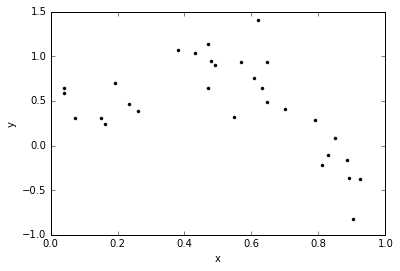

In [26]:
plot_data(data)

In [27]:
def plot_predicoes(data, model):
    plot_data(data)
    deg = len(model.coefficients['value'])-1
    x_pred = graphlab.SFrame({'x1':[i/200.0 for i in range(200)]})
    y_pred = model.predict(polynomial_features(x_pred,deg))
    plt.plot(x_pred['x1'], y_pred, 'g-', label='degree ' + str(deg) + ' fit')
    plt.legend(loc='upper left')
    plt.axis([0,1,-1.5,2])

In [28]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=1e-25)

In [29]:
print_coefficients(model)

Coeficientes do polinômio de grau 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


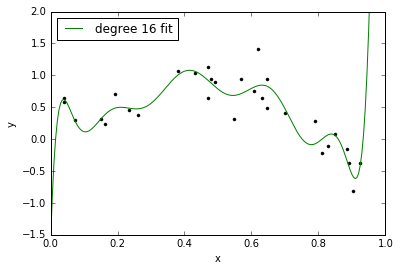

In [25]:
plot_predicoes(data,model)

In [30]:
model = regressao_polinomial_cume(data, deg=16, l2_penalty=100)

In [31]:
print_coefficients(model)

Coeficientes do polinômio de grau 16:
        16          15          14          13          12         11
-0.301 x  - 0.2802 x  - 0.2604 x  - 0.2413 x  - 0.2229 x  - 0.205 x 
           10          9          8          7          6           5
 - 0.1874 x  - 0.1699 x - 0.1524 x - 0.1344 x - 0.1156 x - 0.09534 x
            4           3           2
 - 0.07304 x - 0.04842 x - 0.02284 x - 0.002257 x + 0.6416


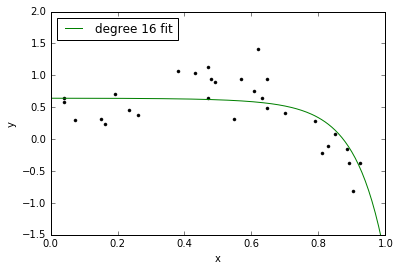

In [32]:
plot_predicoes(data,model)

In [33]:
'''for l2_penalty in [1e-25,1e-10,1e-6,1e-3,1e2]:
    model =  polynomial_ridge_regression(data,deg=16,l2_penalty=l2_penalty)
    print 'lambda = %.2e' % l2_penalty
    print_coefficients(model)
    print '\n'
    plt.figure()
    plot_predicoes(data,model)
    plt.title('Ridge, lambda = %.2e' % l2_penalty)
'''    

"for l2_penalty in [1e-25,1e-10,1e-6,1e-3,1e2]:\n    model =  polynomial_ridge_regression(data,deg=16,l2_penalty=l2_penalty)\n    print 'lambda = %.2e' % l2_penalty\n    print_coefficients(model)\n    print '\n'\n    plt.figure()\n    plot_predicoes(data,model)\n    plt.title('Ridge, lambda = %.2e' % l2_penalty)\n"

In [58]:
import numpy

In [51]:
def loo(data, deg, l2_penalty_values):
    data = polynomial_features(data, deg)
    num_folds = len(data)
    folds = graphlab.cross_validation.KFold(data,num_folds)
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y',
            l2_penalty=l2_penalty,
            validation_set=None,verbose=False)
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
            next_mse = next_mse/num_folds
            l2_penalty_mse.append(next_mse)
            if min_mse is None or next_mse < min_mse:
                min_mse = next_mse
                best_l2_penalty = l2_penalty
                
    return l2_penalty_mse,best_l2_penalty
    l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [52]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [53]:
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

In [54]:
l2_penalty_values

array([  1.00000000e-04,   3.59381366e-03,   1.29154967e-01,
         4.64158883e+00,   1.66810054e+02,   5.99484250e+03,
         2.15443469e+05,   7.74263683e+06,   2.78255940e+08,
         1.00000000e+10])

In [55]:
l2_penalty_mse

[0.0002107106871859755,
 0.0011771162332358898,
 0.0011533461089391283,
 0.00035975576637570597,
 0.001307902638693952,
 0.0041728426325380276,
 0.00018698687452632705,
 0.0014539475580430323,
 0.003285632477047267,
 0.0009918941124564366,
 0.0019843371030901853,
 0.003653674348595894,
 0.00012975764174172455,
 4.135171202891383e-05,
 0.014860264255923416,
 0.0006868883116127176,
 0.00010145988235679362,
 0.01817853697394762,
 0.0010485269119883374,
 0.0023984812771699828,
 0.0026432963121726673,
 0.0011359265193536274,
 0.0010342462905135541,
 0.0051831938890512085,
 0.00039345591788240877,
 0.0033856875948223854,
 0.00292906846579451,
 0.0001257119769389948,
 0.008996811328571578,
 0.04551373161248606,
 0.0012909840091036998,
 0.0027566181199587666,
 0.0010947093451738497,
 0.0011375220159027249,
 0.0025823761519404844,
 0.0019965109438107673,
 0.0004145889219990343,
 0.0019353231377932832,
 0.004067178907719666,
 0.0017370736746756415,
 0.002837278367741241,
 0.002417973344886383,
 

In [56]:
best_l2_penalty

0.0035938136638046258

In [46]:
#Extrapolando para k = 5
def loo(data, deg, l2_penalty_values):
    data = polynomial_features(data, deg)
    num_folds = 5
    folds = graphlab.cross_validation.KFold(data,num_folds)
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y',
            l2_penalty=l2_penalty,
            validation_set=None,verbose=False)
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
            next_mse = next_mse/num_folds
            l2_penalty_mse.append(next_mse)
            if min_mse is None or next_mse < min_mse:
                min_mse = next_mse
                best_l2_penalty = l2_penalty
                
    return l2_penalty_mse,best_l2_penalty
    l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [47]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [48]:
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

In [49]:
l2_penalty_values

array([  1.00000000e-04,   3.59381366e-03,   1.29154967e-01,
         4.64158883e+00,   1.66810054e+02,   5.99484250e+03,
         2.15443469e+05,   7.74263683e+06,   2.78255940e+08,
         1.00000000e+10])

In [50]:
l2_penalty_mse

[1.227205772510418,
 0.3127818511085101,
 0.23070585944603028,
 0.1860342250857218,
 32.04003986377262,
 0.2600660869581271,
 0.13069749255519408,
 0.1758413985724876,
 0.15945220693814716,
 52.26076305095279,
 0.054910058153691675,
 0.0942307413658458,
 0.16732743439627665,
 0.14963925079819457,
 0.5342149315953596,
 0.19826034057461142,
 0.16469202796212085,
 0.25433314751562935,
 0.15397489386752466,
 6.312911201024924,
 0.08253015263320754,
 0.20771654801850006,
 0.3636895621212383,
 0.1751922209251488,
 0.3659577467656653,
 0.04132579110109584,
 0.3174123580343692,
 0.5171991572882375,
 0.25216232804594496,
 1.0020509936150133,
 0.041629242910204325,
 0.32691066160965976,
 0.5289256086695285,
 0.2583493294049034,
 1.1795400765327821,
 0.04164305680921748,
 0.3271889502951226,
 0.5292672698201456,
 0.2585301716285132,
 1.1849189559473172,
 0.04164344563370882,
 0.32719670519388866,
 0.5292767891793121,
 0.2585352107203399,
 1.1850689886233303,
 0.041643456456429445,
 0.327196920987

In [43]:
best_l2_penalty

0.0035938136638046258

In [59]:
#Extrapolando para k = 
def loo(data, deg, l2_penalty_values):
    data = polynomial_features(data, deg)
    num_folds = 5
    folds = graphlab.cross_validation.KFold(data,num_folds)
    l2_penalty_mse = []
    min_mse = None
    best_l2_penalty = None
    for l2_penalty in l2_penalty_values:
        next_mse = 0.0
        for train_set, validation_set in folds:
            model = graphlab.linear_regression.create(train_set,target='Y',
            l2_penalty=l2_penalty,
            validation_set=None,verbose=False)
            y_test_predicted = model.predict(validation_set)
            next_mse += ((y_test_predicted-validation_set['Y'])**2).sum()
            next_mse = next_mse/num_folds
            l2_penalty_mse.append(next_mse)
            if min_mse is None or next_mse < min_mse:
                min_mse = next_mse
                best_l2_penalty = l2_penalty
                
    return l2_penalty_mse,best_l2_penalty
    l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [60]:
l2_penalty_values = numpy.logspace(-4, 10, num=10)

In [61]:
l2_penalty_mse,best_l2_penalty = loo(data, 16, l2_penalty_values)

In [62]:
l2_penalty_values

array([  1.00000000e-04,   3.59381366e-03,   1.29154967e-01,
         4.64158883e+00,   1.66810054e+02,   5.99484250e+03,
         2.15443469e+05,   7.74263683e+06,   2.78255940e+08,
         1.00000000e+10])

In [63]:
l2_penalty_mse

[1.227205772510418,
 0.3127818511085101,
 0.23070585944603028,
 0.1860342250857218,
 32.04003986377262,
 0.2600660869581271,
 0.13069749255519408,
 0.1758413985724876,
 0.15945220693814716,
 52.26076305095279,
 0.054910058153691675,
 0.0942307413658458,
 0.16732743439627665,
 0.14963925079819457,
 0.5342149315953596,
 0.19826034057461142,
 0.16469202796212085,
 0.25433314751562935,
 0.15397489386752466,
 6.312911201024924,
 0.08253015263320754,
 0.20771654801850006,
 0.3636895621212383,
 0.1751922209251488,
 0.3659577467656653,
 0.04132579110109584,
 0.3174123580343692,
 0.5171991572882375,
 0.25216232804594496,
 1.0020509936150133,
 0.041629242910204325,
 0.32691066160965976,
 0.5289256086695285,
 0.2583493294049034,
 1.1795400765327821,
 0.04164305680921748,
 0.3271889502951226,
 0.5292672698201456,
 0.2585301716285132,
 1.1849189559473172,
 0.04164344563370882,
 0.32719670519388866,
 0.5292767891793121,
 0.2585352107203399,
 1.1850689886233303,
 0.041643456456429445,
 0.327196920987

In [64]:
best_l2_penalty

5994.8425031894085